,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Missing values per column:
 Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

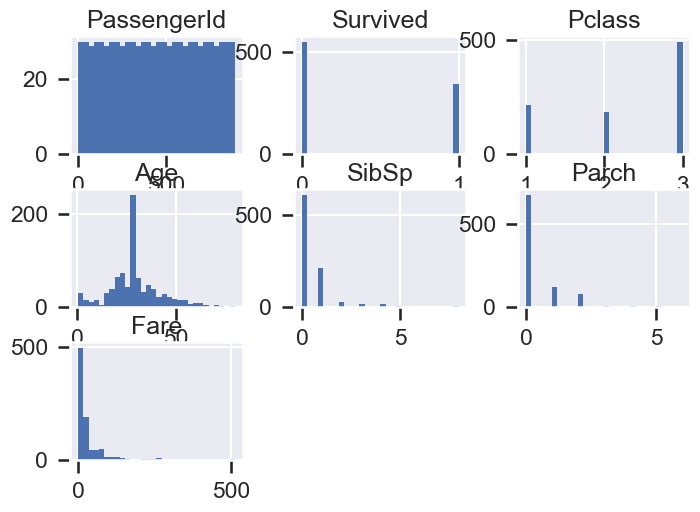

In [38]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-v0_8")
sns.set_context("talk")

# Load CSV (notebook is inside ./notebooks, data is ../data/sample.csv)
df = pd.read_csv("../data/sample.csv")

# Inspect
display(df.head())
print(df.info())
display(df.describe(include="all"))

# Handle missing values (simple rules)
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:\n", missing)

# Drop columns with >60% missing
drop_cols = [c for c in df.columns if df[c].isna().mean() > 0.6]
df_clean = df.drop(columns=drop_cols)

# Impute: numeric → median, categorical → mode
for c in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[c]):
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())
    else:
        df_clean[c] = df_clean[c].fillna(df_clean[c].mode().iloc)

# Charts
num_cols = df_clean.select_dtypes(include=["number"]).columns
cat_cols = df_clean.select_dtypes(include=["object","category"]).columns

# 1) Numeric histogram
if len(num_cols) > 0:
    ax = df_clean[num_cols].hist(bins=30)
    ax.set_title(f"Distribution of {num_cols} - shape & outliers")
    plt.show()

# 2) Top categories bar
if len(cat_cols) > 0:
    top = df_clean[cat_cols].value_counts().head(10)
    sns.barplot(x=top.values, y=top.index, orient="h")
    plt.title(f"Top categories in {cat_cols} - dominant groups")
    plt.xlabel("Count"); plt.ylabel(cat_cols)
    plt.show()

# 3) Correlation heatmap
if len(num_cols) >= 2:
    corr = df_clean[num_cols].corr(numeric_only=True)
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation heatmap - feature relationships")
    plt.show()


In [ ]:
fig, ax = plt.subplots()
df_clean[num_cols].hist(bins=30, ax=ax)
ax.set_title(f"Distribution of {num_cols} - shape & outliers")
plt.show()

In [ ]:
col = num_cols[0]          # pick just one numeric column
fig, ax = plt.subplots()
df_clean[col].hist(bins=30, ax=ax)
ax.set_title(f"Distribution of {col} - shape & outliers")
plt.show()

In [ ]:
# Choose the first categorical column and plot top 10 categories
cat_cols = df_clean.select_dtypes(include=["object","category"]).columns
if len(cat_cols) > 0:
    col = cat_cols
    counts = df_clean[col].value_counts().head(10)
    plt.figure(figsize=(8,5))
    sns.barplot(x=counts.values, y=counts.index, orient="h")
    plt.title(f"Top categories in {col} - dominant groups")
    plt.xlabel("Count"); plt.ylabel(col)
    plt.show()
else:
    print("No categorical columns found.")

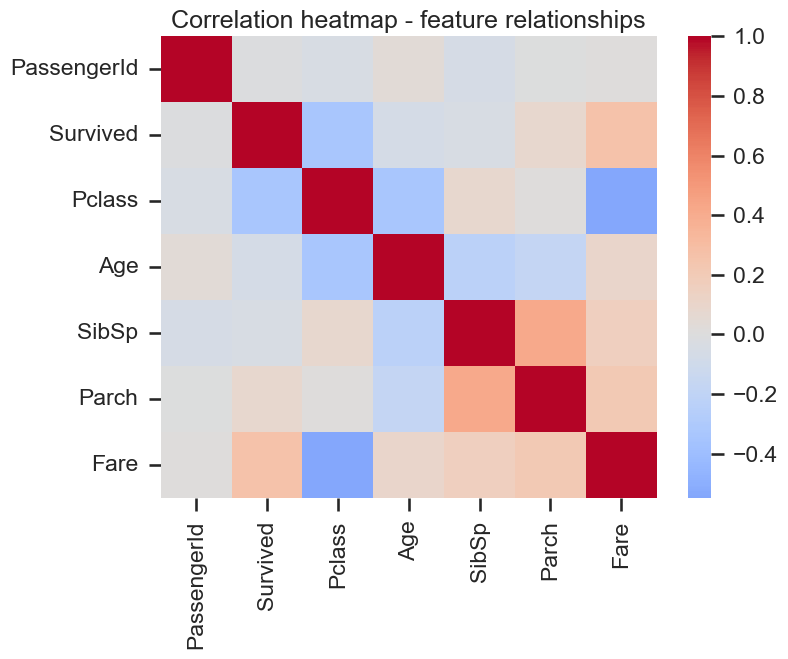

In [39]:
num_cols = df_clean.select_dtypes(include=["number"]).columns
if len(num_cols) >= 2:
    corr = df_clean[num_cols].corr(numeric_only=True)
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Correlation heatmap - feature relationships")
    plt.show()
else:
    print("Not enough numeric columns for a heatmap.")